In [23]:
import importlib
import bike_route_choice

# Make changes to my_module.py

importlib.reload(bike_route_choice)

<module 'bike_route_choice' from 'c:\\Users\\aber\\Documents\\ABM\\src\\asim\\scripts\\resident\\bike_route_choice.py'>

In [24]:
from bike_route_choice import *

In [25]:
cost_limit_mgra = 4
# zone_level = 'mgra'
cost_limit_taz = 30
# zone_level = 'taz'

In [26]:
start_time = time.time()
nodes, edges, traversals = read_bike_network_data(num_centroids=1000, zone_level='mgra')
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time:.2f} seconds")

# Perform Dijkstra's algorithm
start_time = time.time()
shortest_paths, edge_mapping = perform_dijkstras_algorithm(nodes, edges, limit=cost_limit_mgra, zone_level='mgra', num_processors=NUM_PRCESSORS)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time:.2f} seconds")

start_time = time.time()
sp_df_mgra = convert_shortest_paths_to_long_df_numba(shortest_paths, edges, edge_mapping)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time:.2f} seconds")

summarize_shortest_paths(sp_df_mgra)

Reading network data from  T:\ABM\user\aber\bike_route_choice\network
Nodes: (154569, 7) Edges: (366199, 13) Traversals: (724008, 11)
Time taken: 11.48 seconds
Need to calculate Dijkstra's on 1000 centroids with 1 processors
Processing Dijkstra's on 1000 centroids with limit=4...
Time taken: 2.09 seconds
Converting shortest paths to pandas dataframe...
Processing paths with numba...
Creating dataframe...
Time taken: 1.92 seconds
             origin   destination      distance      bikeCost  \
count  1.251300e+04  1.251300e+04  12513.000000  12513.000000   
mean   1.000087e+08  1.000085e+08      2.127983      2.669806   
std    6.505280e+03  6.576778e+03      1.019217      0.913225   
min    1.000001e+08  1.000001e+08      0.035705      0.153638   
25%    1.000030e+08  1.000028e+08      1.322501      1.961049   
50%    1.000075e+08  1.000070e+08      2.043178      2.792023   
75%    1.000129e+08  1.000123e+08      2.866184      3.460449   
max    1.000243e+08  1.000243e+08      5.924082

In [27]:
start_time = time.time()
nodes, edges, traversals = read_bike_network_data(num_centroids=500, zone_level='taz')
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time:.2f} seconds")

# Perform Dijkstra's algorithm
start_time = time.time()
shortest_paths, edge_mapping = perform_dijkstras_algorithm(nodes, edges, limit=cost_limit_taz, zone_level='taz', num_processors=NUM_PRCESSORS)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time:.2f} seconds")

start_time = time.time()
sp_df_taz = convert_shortest_paths_to_long_df_numba(shortest_paths, edges, edge_mapping)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time:.2f} seconds")

summarize_shortest_paths(sp_df_taz)

Reading network data from  T:\ABM\user\aber\bike_route_choice\network
Nodes: (154569, 7) Edges: (366199, 13) Traversals: (724008, 11)
Time taken: 11.22 seconds
Need to calculate Dijkstra's on 500 centroids with 1 processors
Processing Dijkstra's on 500 centroids with limit=30...
Time taken: 13.96 seconds
Converting shortest paths to pandas dataframe...
Processing paths with numba...
Creating dataframe...
Time taken: 19.95 seconds
             origin   destination       distance       bikeCost  \
count  1.132870e+05  1.132870e+05  113287.000000  113287.000000   
mean   2.000024e+08  2.000023e+08      14.599910      17.178151   
std    1.328835e+03  1.292672e+03       6.874906       7.522612   
min    2.000000e+08  2.000000e+08       0.087997       0.151151   
25%    2.000013e+08  2.000012e+08       9.219817      11.203374   
50%    2.000023e+08  2.000022e+08      14.621108      17.468746   
75%    2.000036e+08  2.000034e+08      19.793296      23.509729   
max    2.000049e+08  2.000049e

Plotting the shortest path...


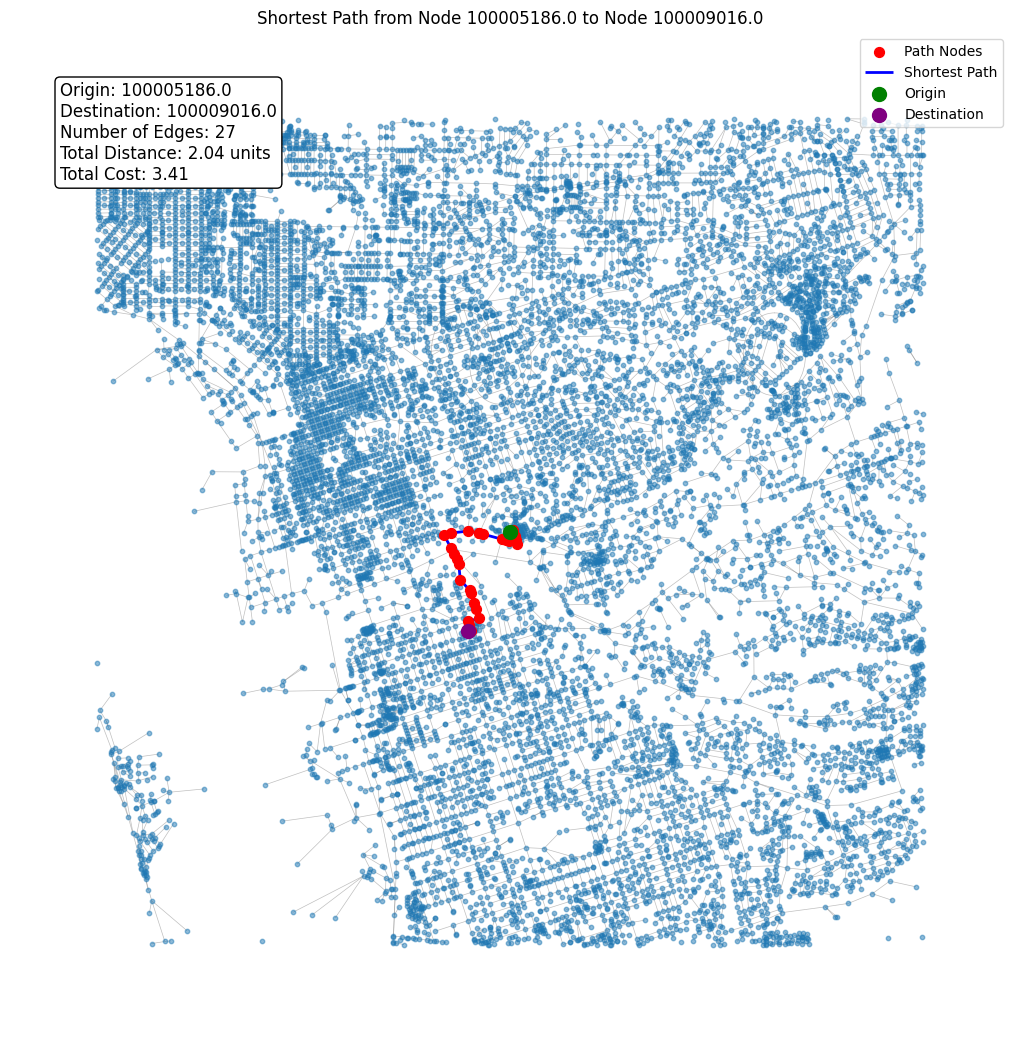

In [28]:
# Plot shortest path between random origin and destination
sp_df_mgra_rand = sp_df_mgra.sample(1)
origin = sp_df_mgra_rand.iloc[0]['origin']
destination = sp_df_mgra_rand.iloc[0]['destination']
plot_shortest_path_with_results_buffered(nodes, edges, sp_df_mgra, origin, destination, buffer_size=5280*cost_limit_mgra)

Plotting the shortest path...


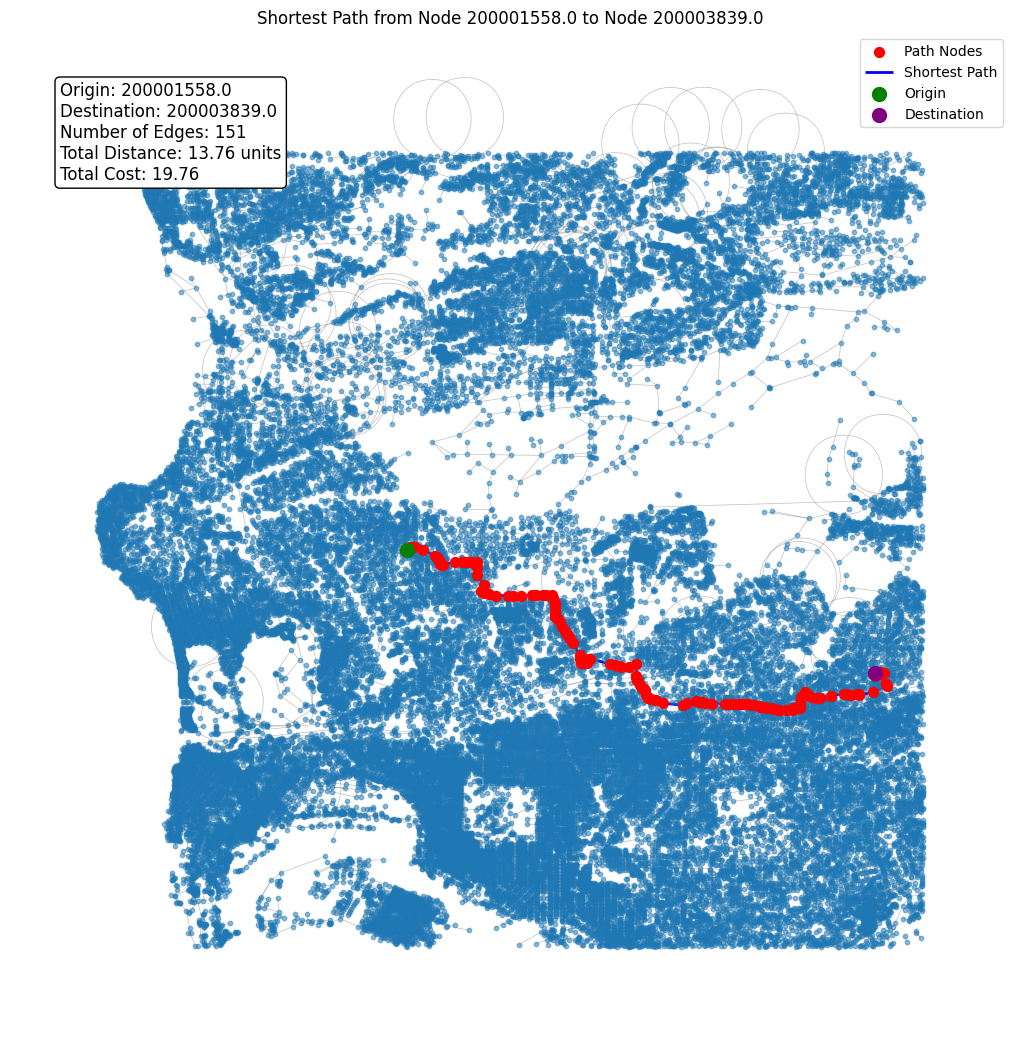

In [29]:
# Plot shortest path between random origin and destination
sp_df_taz_rand = sp_df_taz.sample(1)
origin = sp_df_taz_rand.iloc[0]['origin']
destination = sp_df_taz_rand.iloc[0]['destination']
plot_shortest_path_with_results_buffered(nodes, edges, sp_df_taz, origin, destination, buffer_size=(5280/3)*cost_limit_taz)